In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from pprint import pprint
from collections import namedtuple

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams["image.origin"] = 'lower'
 
%matplotlib notebook

In [2]:
data = np.load("output_transp_EB_ix1.npy")
data_EE = np.load("transp_data_EE.npy", mmap_mode="r")
data_EB = np.load("transp_data_EB.npy", mmap_mode="r")

In [3]:
timesteps_df = pd.read_csv("output_metadata_2017.csv")
transp_raw = pd.read_csv("transp_metadata_2017.csv",sep=",")

In [4]:
tdf = timesteps_df.iloc[:len(data)]

<IPython.core.display.Javascript object>


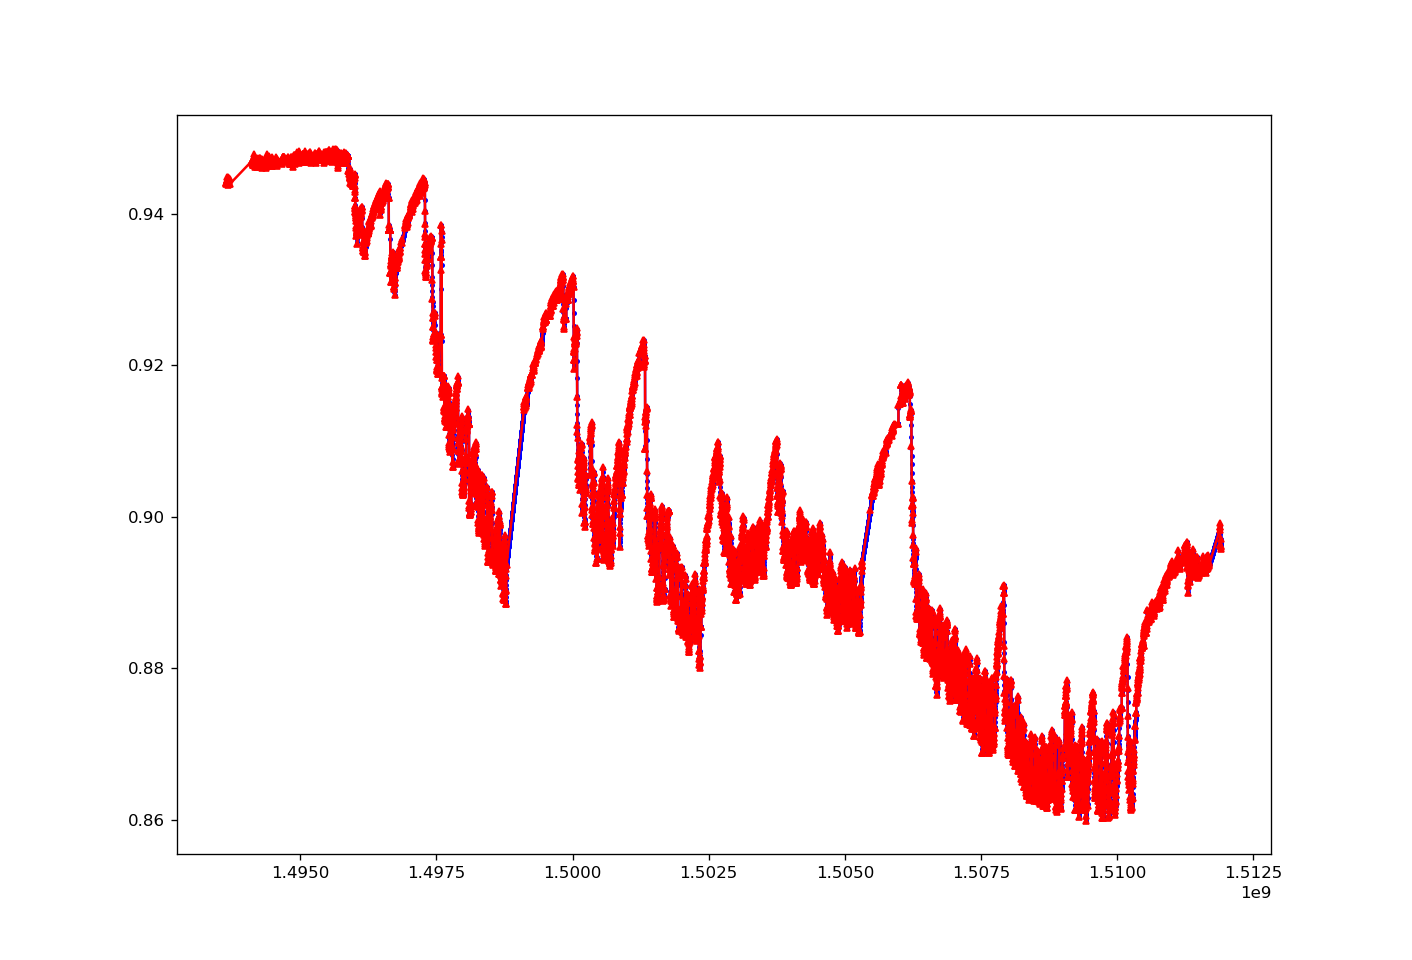

In [7]:
plt.plot(tdf.time, data[:,0], "bo-", markersize=2)
plt.plot(transp_raw.time,  data_EB[:,85,0], "r^-", markersize=4)

<IPython.core.display.Javascript object>


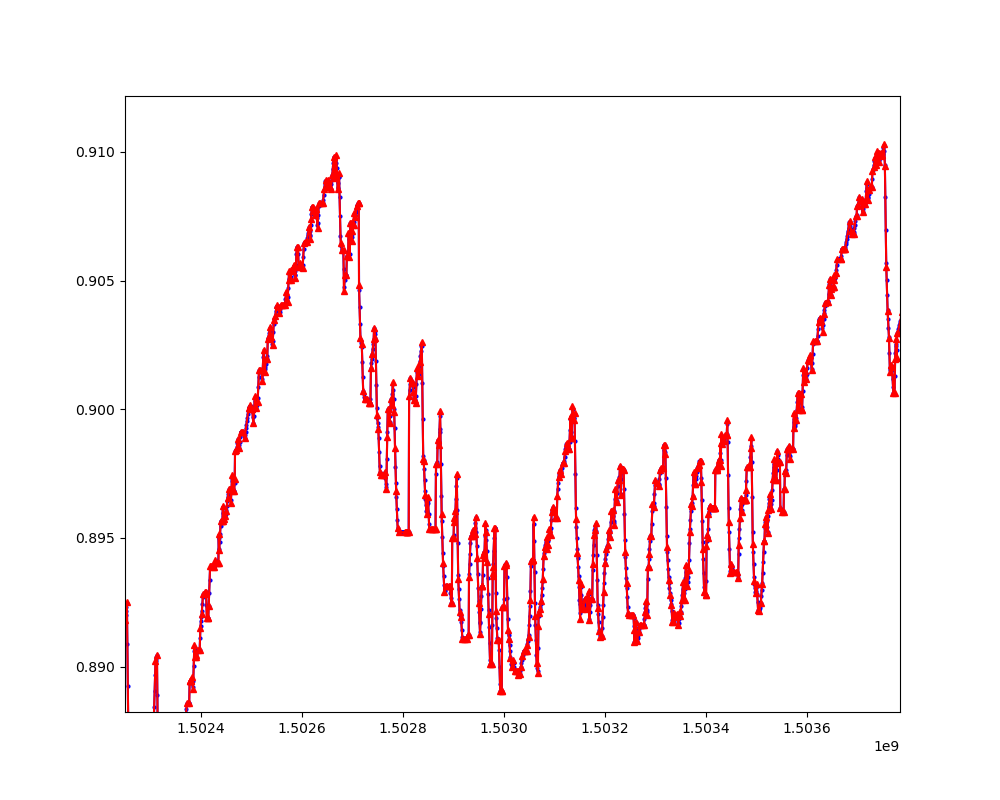

In [28]:
plt.plot(tdf.time, data[:,0], "bo-", markersize=2)
plt.plot(transp_raw.time,  data_EB[:,85,0], "r^-", markersize=4)

# Transparency with lumi and time

<IPython.core.display.Javascript object>


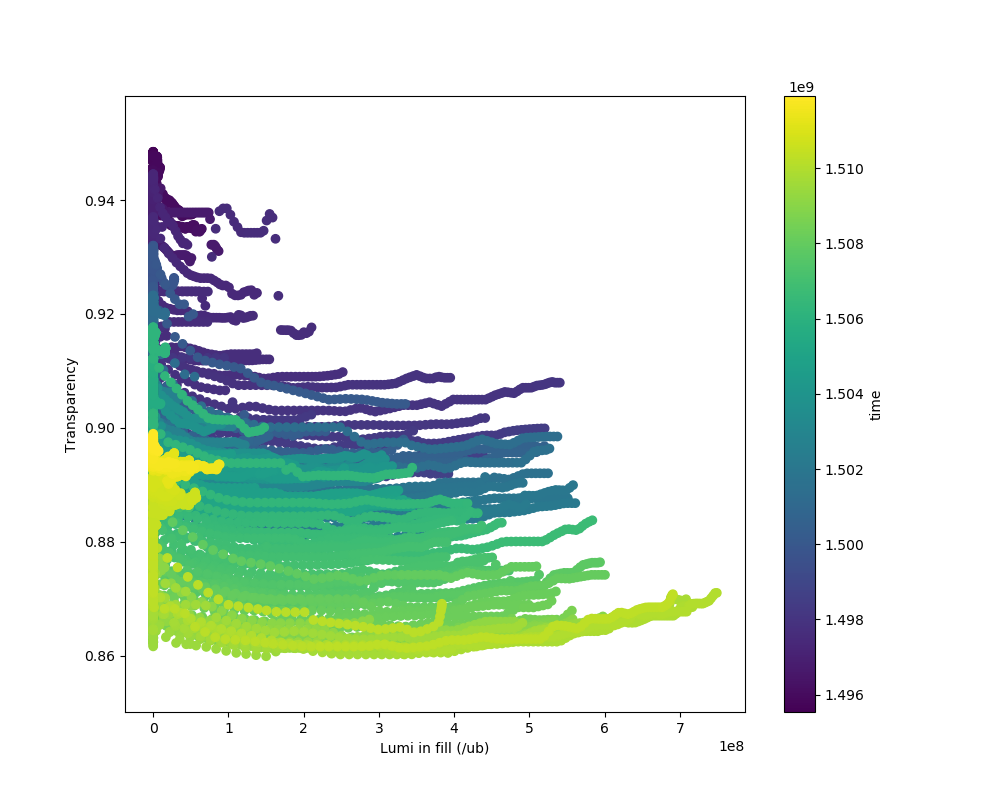

In [60]:
plt.scatter(tdf.lumi_in_fill, data[:,0], c= tdf.time)
cbar = plt.colorbar()
plt.xlabel("Lumi in fill (/ub)")
plt.ylabel("Transparency")
cbar.set_label("time")

<IPython.core.display.Javascript object>


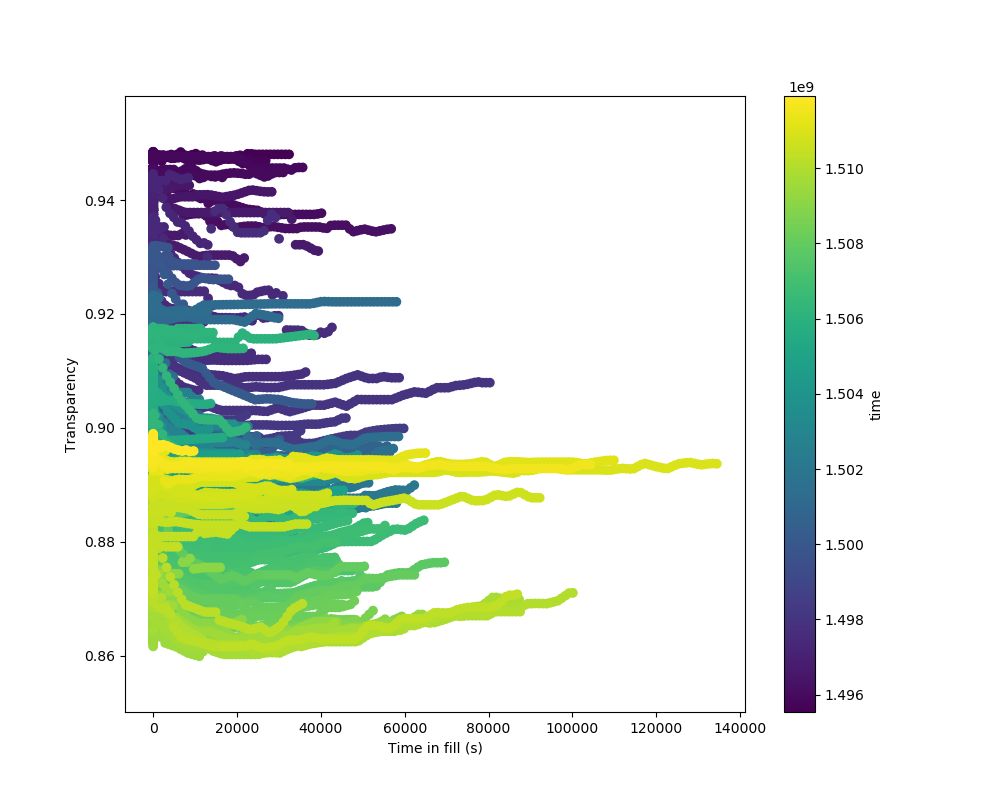

In [32]:
plt.scatter(tdf.time_in_fill, data[:,0], c= tdf.time)
cbar = plt.colorbar()
plt.xlabel("Time in fill (s)")
plt.ylabel("Transparency")
cbar.set_label("time")

<IPython.core.display.Javascript object>


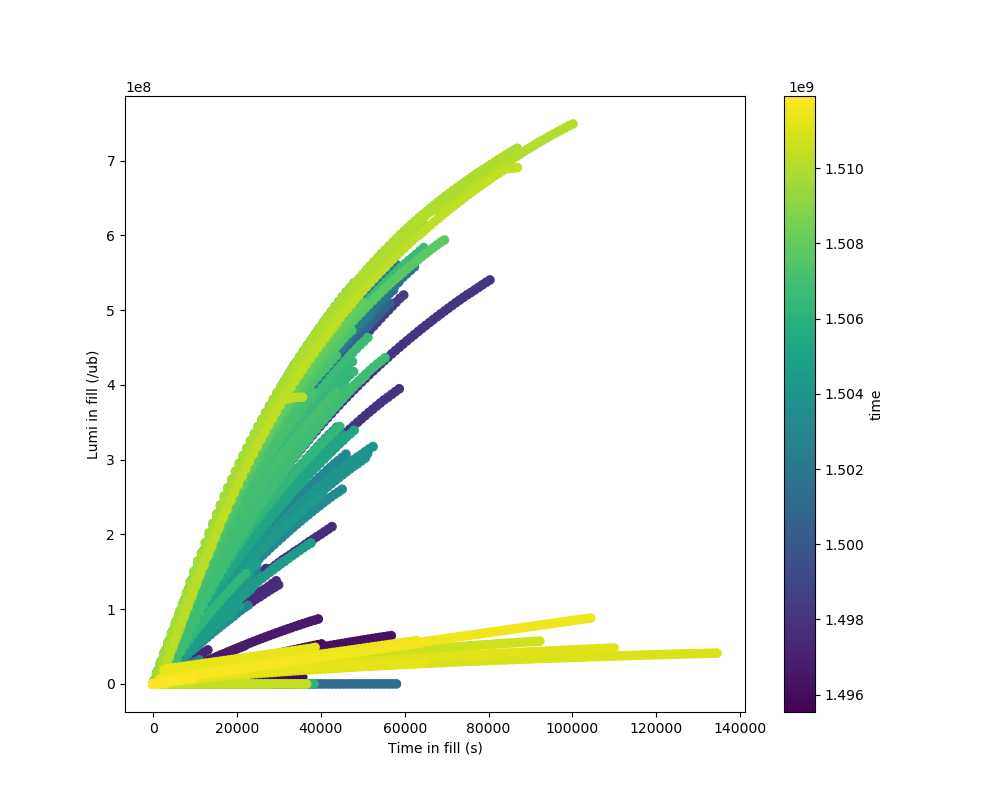

In [33]:
plt.scatter(tdf.time_in_fill, tdf.lumi_in_fill, c= tdf.time)
cbar = plt.colorbar()
plt.xlabel("Time in fill (s)")
plt.ylabel("Lumi in fill (/ub)")
cbar.set_label("time")

<IPython.core.display.Javascript object>


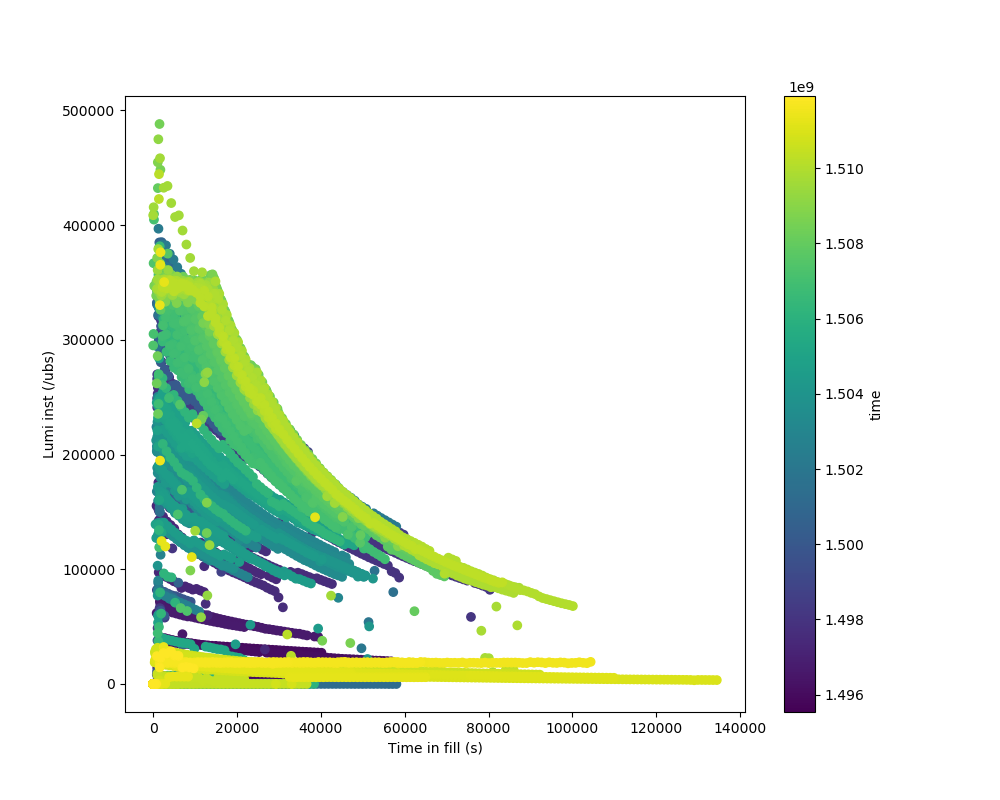

In [34]:
plt.scatter(tdf.time_in_fill, tdf.lumi_inst, c= tdf.time)
cbar = plt.colorbar()
plt.xlabel("Time in fill (s)")
plt.ylabel("Lumi inst (/ubs)")
cbar.set_label("time")

In [39]:
tdf.head()

,in_fill,time,lumi_inst,lumi_in_fill,lumi_since_last_point,lumi_last_fill,fill_num,time_in_fill,time_in_fill_stable,time_from_last_fill,last_dump_duration,last_fill_duration
0,1,1495541393,0.12584,0.12584,0.125840,0.000000,5697,0,0.0,0,0,0
1,0,1495542293,0.00000,0.00000,0.493614,0.493614,0,0,0.0,833,833,67
2,0,1495543193,0.00000,0.00000,0.000000,0.493614,0,0,0.0,1733,1733,67
3,0,1495544093,0.00000,0.00000,0.000000,0.493614,0,0,0.0,2633,2633,67
4,0,1495544993,0.00000,0.00000,0.000000,0.493614,0,0,0.0,3533,3533,67


# recovery plot

<IPython.core.display.Javascript object>


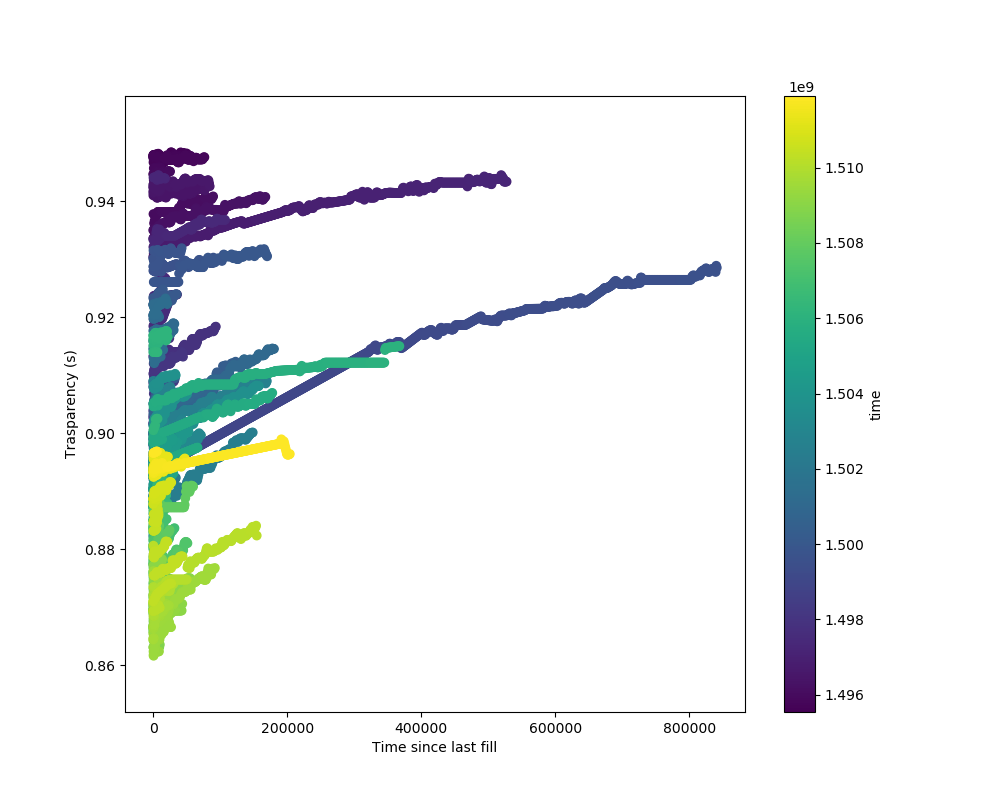

In [53]:
plt.scatter(tdf[tdf.lumi_inst== 0].time_from_last_fill, data[tdf.lumi_inst== 0, 0], c= tdf[tdf.lumi_inst== 0].time)
cbar = plt.colorbar()
plt.xlabel("Time since last fill")
plt.ylabel("Trasparency (s)")
cbar.set_label("time")

# Smoothing

In [64]:
infill_cut = tdf.in_fill == 1
outfill_cut = tdf.in_fill == 0

In [104]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, axis= 0)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [96]:
data_infill_smooth = moving_average(data[infill_cut, :], n=3)
data_outfill_smooth = moving_average(data[outfill_cut, :], n=3)

In [97]:
data_in_fill_smooth

array([[0.94768774, 0.9699475 , 0.97536606, ..., 0.97007661, 0.9601109 ,
        0.96768895],
       [0.94771606, 0.9698899 , 0.97524147, ..., 0.97013554, 0.95998827,
        0.96760802],
       [0.94768523, 0.96970007, 0.97509738, ..., 0.97013777, 0.96006197,
        0.96762689],
       ...,
       [0.89603465, 0.9502501 , 0.9473569 , ..., 0.95999036, 0.94855721,
        0.95629156],
       [0.89596211, 0.95007404, 0.94735817, ..., 0.96007161, 0.94884318,
        0.95659969],
       [0.89596536, 0.94996556, 0.94734476, ..., 0.96029477, 0.94924878,
        0.95695848]])

<IPython.core.display.Javascript object>


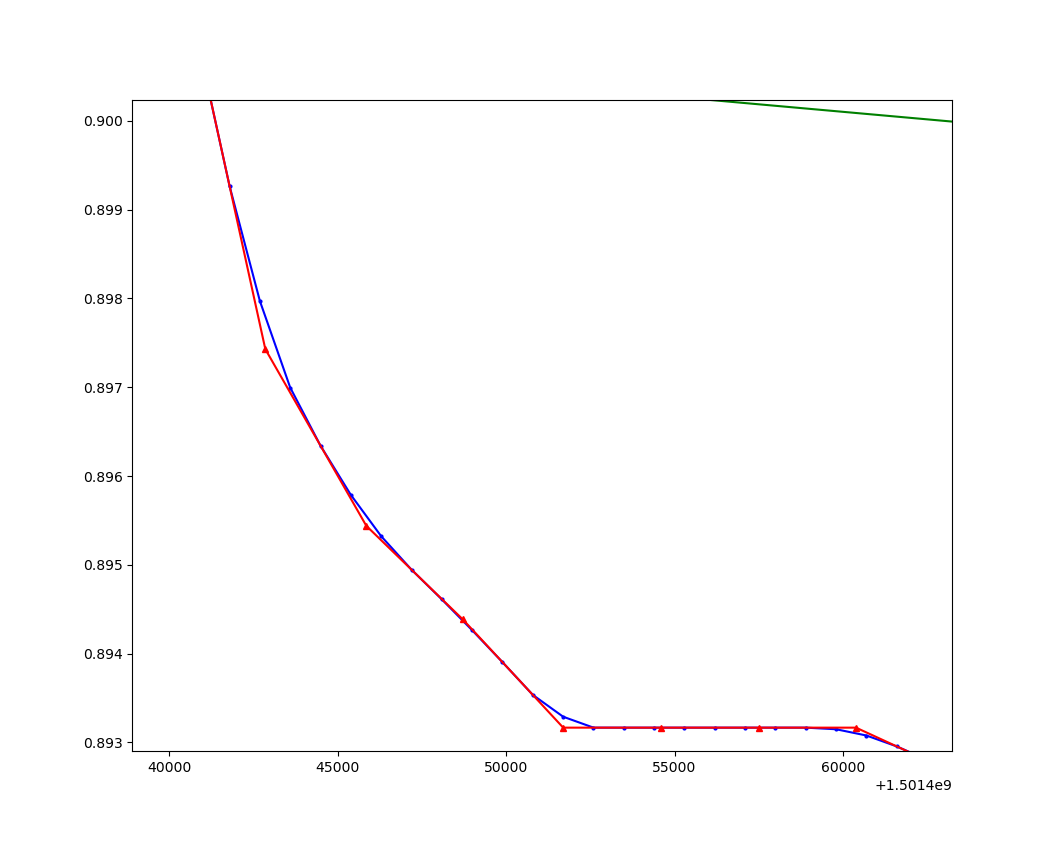

In [100]:
plt.plot(tdf[infill_cut].iloc[1:-1].time, data_infill_smooth[:,0], "bo-", markersize=2)
plt.plot(tdf[outfill_cut].iloc[1:-1].time, data_outfill_smooth[:,0], "go-", markersize=2)
plt.plot(transp_raw.time,  data_EB[:,85,0], "r^-", markersize=4)